# Part II - An Exploratory Analysis of the Ford GoBike System Data

## by Batool Hammouda

## Investigation Overview

The Ford GoBike System data is investigated in this presentation to show how user behavior varies depending on various demographic and temporal factors.  Using structured visual exploration techniques, the analysis aims to uncover insights about age, gender, trip duration, user type, and trip timing.

 The aim is to provide answers to important questions like:

 Who uses the system more frequently, and how do usage patterns differ across user types and genders?

 How do age, time of day, and user demographics influence trip duration?


## Dataset Overview and Executive Summary

The Ford GoBike System dataset contains detailed information about bike-sharing trips taken in the San Francisco Bay Area during February 2019.

- Key Insights from the Analysis:

A log transformation was applied to reduce skewness because most trips last less than 30 minutes. While subscribers are larger in number, customers typically take longer, slower trips. Female riders record longer average durations, particularly in the early morning and late evening, and younger riders (less than 40) typically travel longer. While usage frequency is highest during commute times, trip durations peak outside of commute hours, and unusual ages over 90 raise concerns about data quality. Males show higher subscriber commitment rates, and the 18-25 age group exhibits the most variable trip patterns, especially during 2-4 AM. Middle-aged riders (26-55) demonstrate the most consistent travel behavior, while complex interactions between age, gender, and time create non-linear usage patterns rather than simple correlations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


## Distribution of Log-Transformed Trip Durations

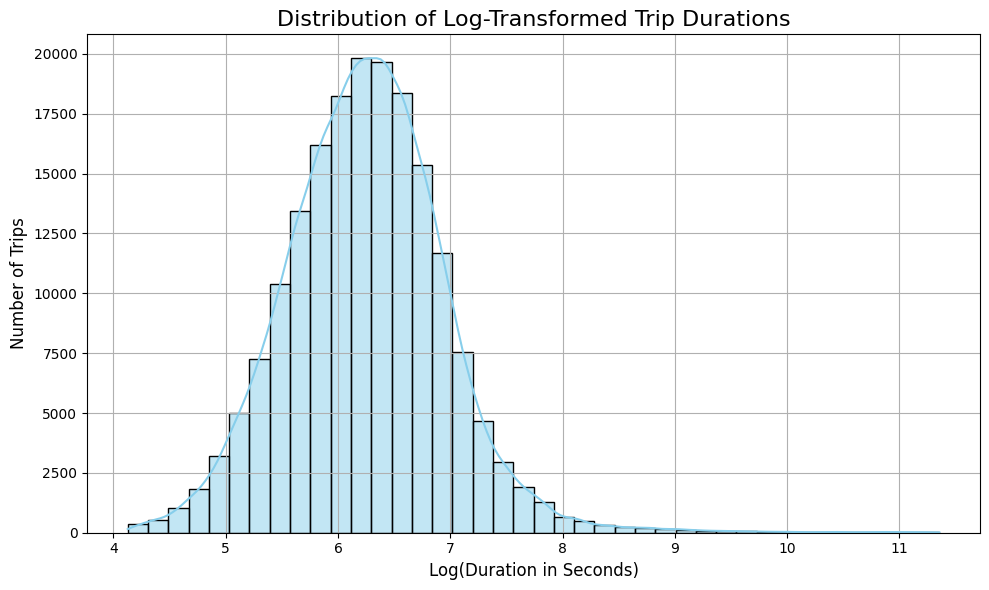

In [3]:
#Apply log transformation (we add 1 to avoid log(0))
df['log_trip_duration'] = np.log1p(df['duration_sec'])

#Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['log_trip_duration'], bins=40, color='skyblue', kde=True)

#Plot formatting
plt.title('Distribution of Log-Transformed Trip Durations', fontsize=16)
plt.xlabel('Log(Duration in Seconds)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Most trips took less than 30 minutes, and the original trip duration data was skewed to the right. A log transformation was utilized to normalize the distribution and enhance the visibility of patterns.

##  Log Trip Duration by User Type

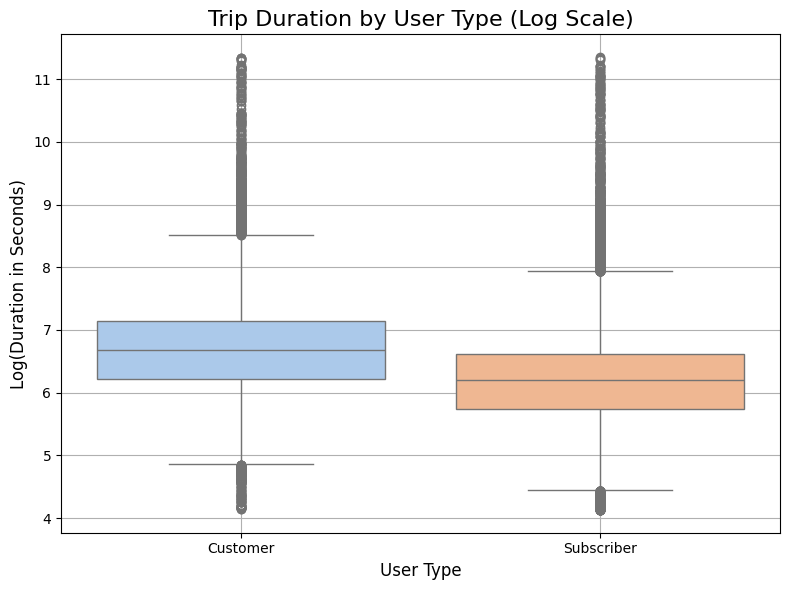

In [4]:
plt.figure(figsize=(8, 6))

# Create the box plot
sns.boxplot(data=df, x='user_type', y='log_trip_duration', palette='pastel')

# Plot formatting
plt.title('Trip Duration by User Type (Log Scale)', fontsize=16)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Log(Duration in Seconds)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Customers generally take longer trips than Subscribers. This supports the insight that Customers likely use the service for more casual or recreational purposes, while Subscribers may use it more for short, routine commutes.

## Average Trip Duration by Hour and Gender

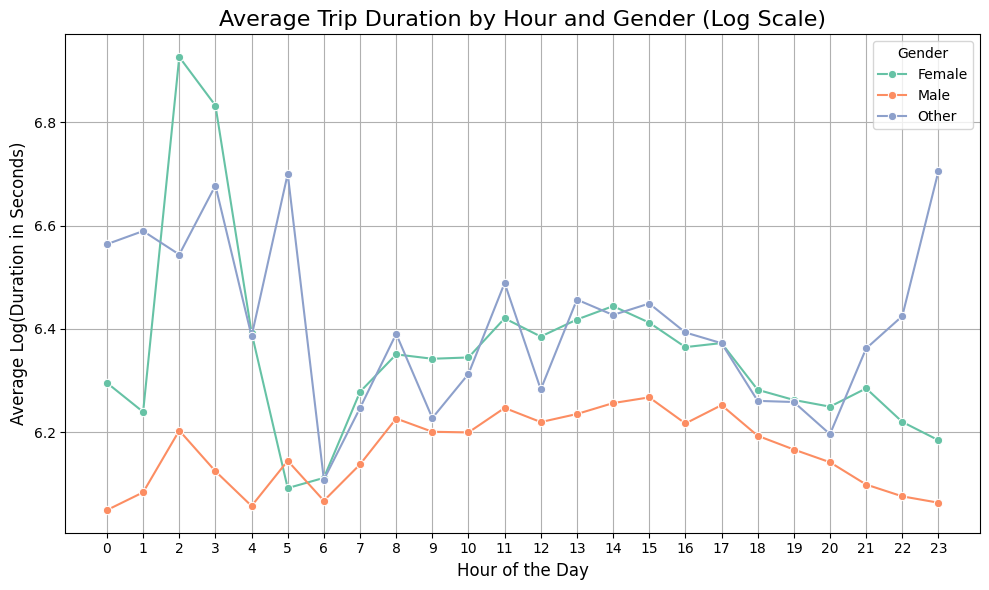

In [6]:
df['start_time'] = pd.to_datetime(df['start_time'])

#Extract the hour from start_time
df['hour'] = df['start_time'].dt.hour

#Group by hour and gender, and calculate mean log duration
hour_gender_avg = df.groupby(['hour', 'member_gender'])['log_trip_duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_gender_avg, x='hour', y='log_trip_duration', hue='member_gender', marker='o', palette='Set2')

# Plot formatting
plt.title('Average Trip Duration by Hour and Gender (Log Scale)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Log(Duration in Seconds)', fontsize=12)
plt.xticks(range(0, 24)) 
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

The peak trip lengths occur in the early morning and late evening, indicating periods of more flexible or slowly use.  Unexpectedly, during the majority of hours, female riders consistently record longer average durations than male riders, confirming behavioral differences in bike usage based on gender.